In [1]:
#autor - Michał Tokarski
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
import math
from random import Random

In [3]:
def exponential(lam, n):
    U = np.random.random(n)
    X = -np.log(U)/(lam)
    return X




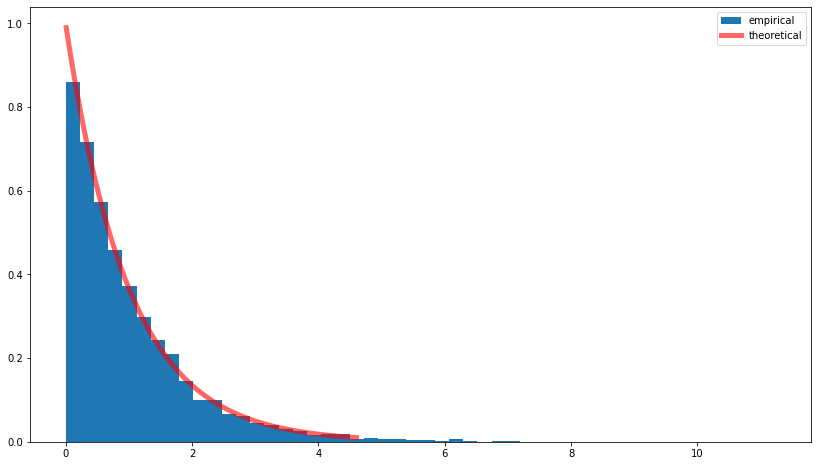

In [4]:
plt.figure(figsize=(14,8))
X = exponential(1,10000)
plt.hist(X, density=True, bins=50, label = 'empirical')
x = np.linspace(scipy.stats.expon.ppf(0.01),
                scipy.stats.expon.ppf(0.99), 100)
plt.plot(x, scipy.stats.expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='theoretical')
plt.legend()

In [5]:
np.mean(X)

1.0075589080455627

In [6]:
np.var(X)


0.9851202285479512

In [7]:
#wartości empiryczne w przybliżeniu zgadzają się co do wartości teoretycznych, to 1 i 1
#porównamy teraz kwantyle


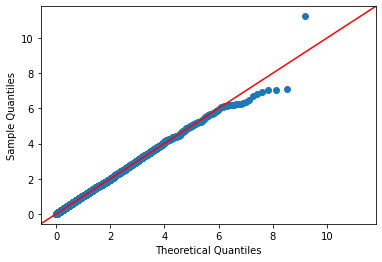

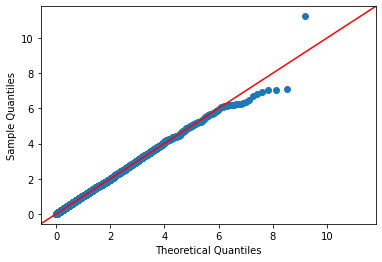

In [8]:
sm.qqplot(X, line ='45',dist=scipy.stats.expon)


In [9]:
#dystrybuanta:

In [10]:
cdfx = np.sort(X)
x_val = np.linspace(start=min(cdfx),stop=max(cdfx),num=len(cdfx))
size = X.size
y_val = []
for i in x_val:
    temp = X[X <= i]
    value = temp.size / size
    y_val.append(value)

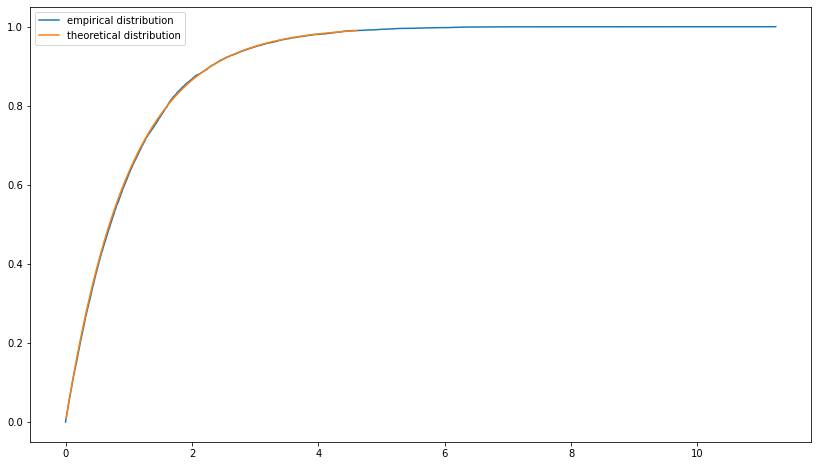

In [11]:
plt.figure(figsize=(14,8))
plt.plot(x_val,np.array(y_val), label = "empirical distribution")
x = np.linspace(scipy.stats.expon.ppf(0.01),
                scipy.stats.expon.ppf(0.99), 100)
plt.plot(x, scipy.stats.expon.cdf(x), label = 'theoretical distribution')
plt.legend()

In [12]:
#teraz rozkład normalny:

In [13]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
U = np.random.random(1000)
X = scipy.stats.norm.ppf(U,mu,sigma)

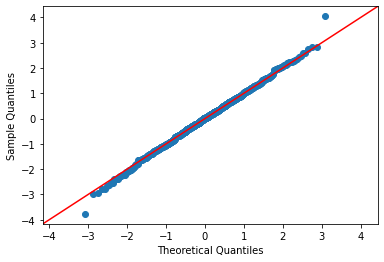

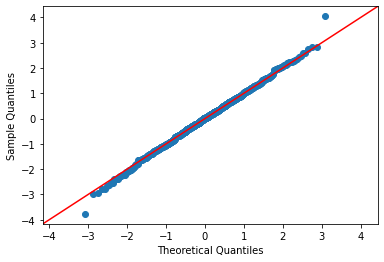

In [14]:
sm.qqplot(X, line ='45')

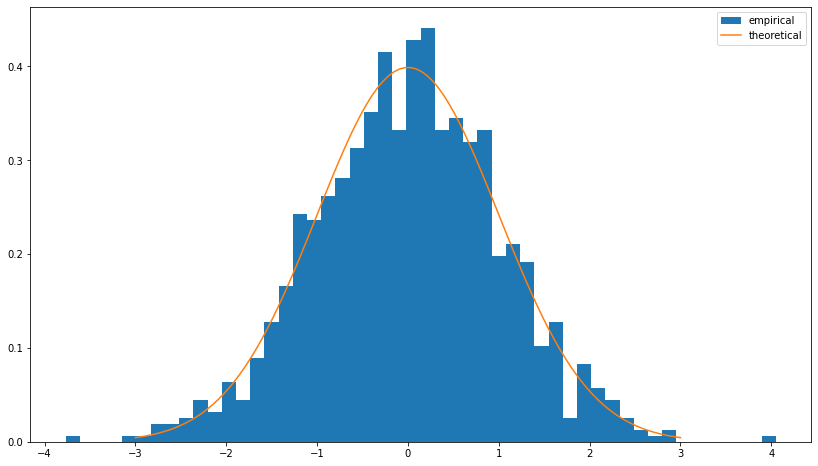

In [15]:
plt.figure(figsize=(14,8))
plt.hist(X,bins = 50, density=True, label="empirical")
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), label = 'theoretical')
plt.legend()

In [16]:
np.mean(X)

0.00020357068786889875

In [17]:
np.var(X)
#wartości empiryczne w przybliżeniu zgadzają się co do wartości teoretycznych, to jest kolejno 0 i 1

1.0372718552788

In [18]:
cdfx = np.sort(X)
x_val = np.linspace(start=min(cdfx),stop=max(cdfx),num=len(cdfx))
size = X.size
y_val = []
for i in x_val:
    temp = X[X <= i]
    value = temp.size / size
    y_val.append(value)

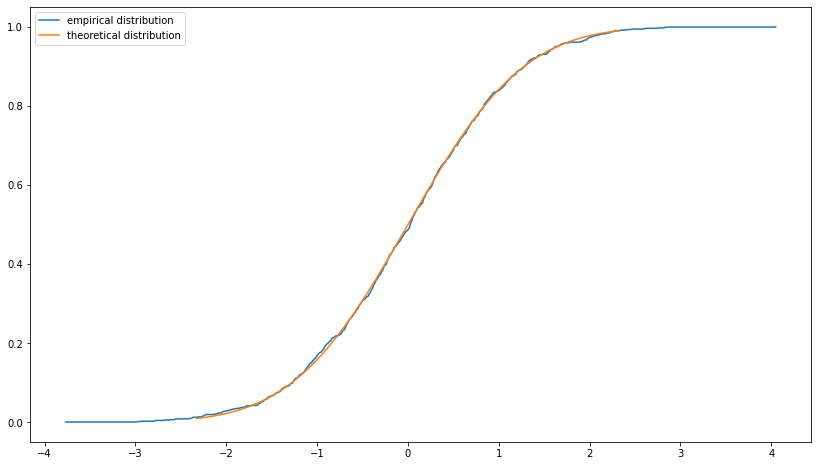

In [19]:
plt.figure(figsize=(14,8))
plt.plot(x_val,np.array(y_val), label = "empirical distribution")
x = np.linspace(scipy.stats.norm.ppf(0.01),
                scipy.stats.norm.ppf(0.99), 100)
plt.plot(x, scipy.stats.norm.cdf(x), label = 'theoretical distribution')
plt.legend()

In [20]:
#zadanie 2
#Użyłem metody Newtona do wyliczenia miejsca zerowego dla funkcji f(x) - u, chyba o to chodziło!! ^-^

In [21]:
def my_newton(f,df,x0,tol,u):
    if abs(f(x0,u)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0,u)/df(x0), tol,u)
    
f = lambda x,u:  (1/2)*(1+math.erf(x/(np.sqrt(2)))) - u
df = lambda x: np.exp(-(x**2)/2)/(np.sqrt(2*np.pi))

In [22]:
my_newton(f,df,-1,0.01,0.1)

-1.2424064070065495

In [23]:
x = np.linspace(0,1,100)
y = []
for i in x:
    y.append(my_newton(f,df,-1,0.01,i))


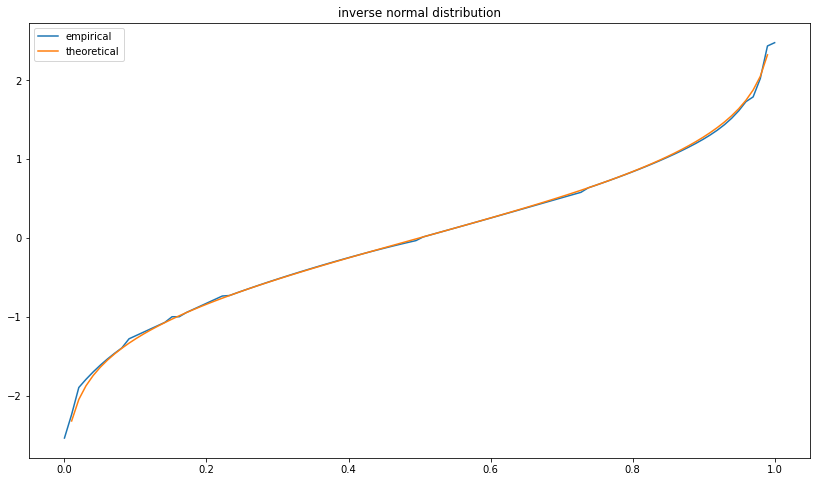

In [24]:
plt.figure(figsize=(14,8))
plt.title("inverse normal distribution")
plt.plot(x,y,label = "empirical")
plt.plot(x,scipy.stats.norm.ppf(x), label = "theoretical")
plt.legend()

In [25]:
#zadanie 3

In [26]:
prob_dist = [{"value":1,"probability":0.11},
             {"value":2,"probability":0.12},
             {"value":3,"probability":0.27},
             {"value":4,"probability":0.19},
             {"value":5,"probability":0.31}
             ]

In [27]:
def draw_from_non_uniform_distribution(probability_distribution):

    member_count = len(probability_distribution)
    step_size = 1.00 / (member_count * 1.00)

    accept = False
    r_value = 0
    r_probability = 0

    while accept == False:
        random_generator = Random()
        r_temp = random_generator.random()

        bin = math.ceil(r_temp / step_size)
        binned_object = probability_distribution[bin - 1]
        r_value = binned_object['value']
        r_probability = binned_object['probability']
        s = random_generator.random()

        if (s <= r_probability):
            accept = True
        else:
            accept = False

    return r_value

In [28]:
draw_from_non_uniform_distribution(probability_distribution=prob_dist)
bins = {}

In [29]:
n = 10000
for i in range(n):

    r_value = draw_from_non_uniform_distribution(prob_dist)

    if (bins.get(r_value) != None):
        bins[r_value] += 1
    else:
        bins[r_value] = 1

myKeys = list(bins.keys())
myKeys.sort()
sorted_bins = {i: bins[i] for i in myKeys}
sorted_bins_values = list(sorted_bins.values())
sorted_bins_values_prob = np.array(sorted_bins_values)/n

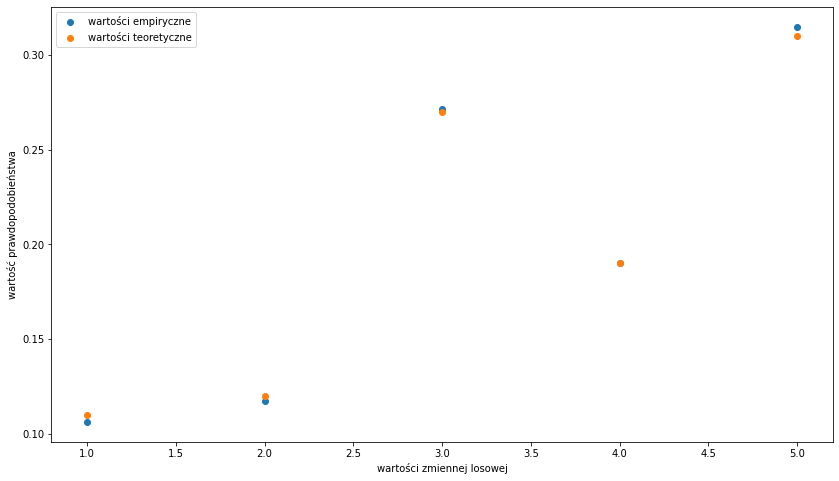

In [30]:
plt.figure(figsize=(14,8))
plt.scatter(np.arange(1,6,1),sorted_bins_values_prob, label='wartości empiryczne')
plt.scatter(np.arange(1,6,1),[0.11,0.12,0.27,0.19,0.31], label = 'wartości teoretyczne')
plt.xlabel("wartości zmiennej losowej")
plt.ylabel("wartość prawdopodobieństwa")
plt.legend()
plt.show()

In [31]:
def Gamma(n):
    results = []
    for i in range(n):
        while True:
            X = np.random.exponential(scale = 6)
            Y = np.random.random()
            if Y <= ((1/16)*(X**2)*np.exp(-X/2))/((2/3)*np.exp(-X/6)):
                results.append(X)
                break
    return results

In [32]:
n = 10000
G = Gamma(n)
x = np.linspace(0.001, 20, 1000)

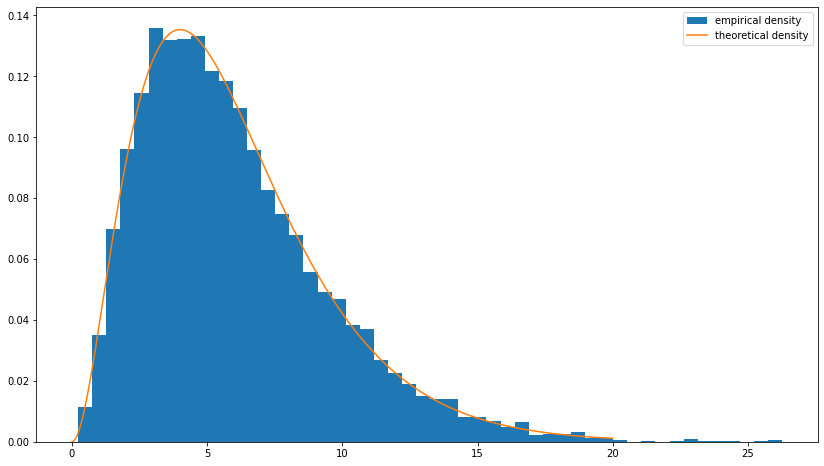

In [33]:
plt.figure(figsize=(14,8))
plt.hist(G,bins=50,density = True, label = 'empirical density')
plt.plot(x, scipy.stats.gamma.pdf(x,3, scale = 2), label = 'theoretical density')
plt.legend()
plt.show()